# Pima Indian Diabetes dataset

In [44]:
# read the data into a Pandas DataFrame
import pandas as pd
file = 'pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(file, header=None, names=col_names)

In [45]:
# show the first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
all_feature_cols = col_names[1:8]
X = pima[all_feature_cols]
y = pima.label

In [47]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [48]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [50]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.78125


In [51]:
# calculate null accuracy, which is greater of average value of y_test or 1 minus
# average value of y_test; we can do significantly better than null accuracy using all of
# the predictors
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

## Confusion Matrices

In [52]:
# compare true and predicted responses; errors / misclassifications are not usually evenly 
# distributed across classes; model does better at predicting some classes than others
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[115  15]
 [ 27  35]]


In [53]:
# save confusion matrix and slice in to four pieces for TN, TP, FN, FP
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TN = confusion[0,0]
TP = confusion[1,1]
FN = confusion[1,0]
FP = confusion[0,1]

### Classification Accuracy

In [54]:
# correct predictions as a percentage of total predictions
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.78125
0.78125


### Classification Error / Misclassification Rate

In [55]:
# correct predictions as a percentage of total predictions
print((FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.21875
0.21875


### Sensitivity / True Positive Rate / Recall

In [56]:
# when actual value is positive, what percentage are correctly predicted
print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.564516129032
0.564516129032


### Specificity

In [57]:
# when actual value is negative, what percentage are correctly predicted
print(TN / (TN + FP))

0.884615384615


### False Positive Rate

In [58]:
# when actual value is negative, what percentage are misclassified
print(FP / (TN + FP))

0.115384615385


### Precision

In [59]:
# when positive is predicted, what percentage are correctly classified
print(TP/(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.7
0.7


## Adjusting the Classification Threshold

In [60]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:,1]

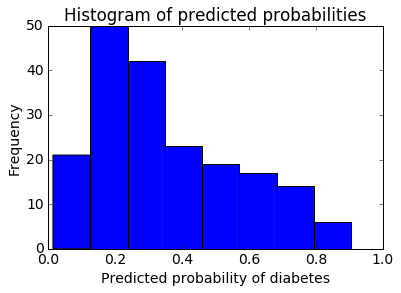

In [61]:
# plot predicted probabilities
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [62]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.3)[0]

/home/stephen/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [64]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))
# Note that sensitivity has increased but specificity has decreased

[[87 43]
 [ 9 53]]


## ROC Curves and AUC

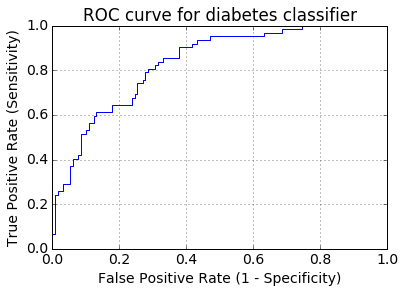

In [65]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [66]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.834863523573


In [67]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.82419658119658123